In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-storm-10/DATA STORM 1.0 - First Round Competition Guidlines.pdf
/kaggle/input/data-storm-10/credit_card_default_test.csv
/kaggle/input/data-storm-10/credit_card_default_train.csv
/kaggle/input/data-storm-10/Credit_card_default - Business Problem - Assessment Criteria - Data Dictionary.xlsx


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and preprocessing

In [3]:
#Load data
df=pd.read_csv('/kaggle/input/data-storm-10/credit_card_default_train.csv')

In [4]:
df.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [5]:
#Check null
df.isnull().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [6]:
#check duplicates
duplicated=df.duplicated().sum()
duplicated

0

In [7]:
#changing credit limit to numeric
df['balance_unclean']=(df['Balance_Limit_V1'].str.strip().str.findall(r'[0-9]*')).apply(lambda x:''.join(x))
df['balance_thousand']=df['Balance_Limit_V1'].str.strip().str.replace(r'[0-9.]*','')
df['balance_limit_clean']=0
df.loc[df['balance_thousand']=='K','balance_limit_clean']=df['balance_unclean'].astype(int)*1000
df.loc[df['balance_thousand']=='M','balance_limit_clean']=df['balance_unclean'].astype(int)*100000

df=df.drop(['balance_thousand','balance_unclean'],axis=1)

In [8]:
#Change Age to more understandable categories
print(df.AGE.unique())
df['Age_int']=df['AGE']
df['Age_int']=df['Age_int'].str.replace('Less than 30','Young')
df['Age_int']=df['Age_int'].str.replace('31-45','Young')
df['Age_int']=df['Age_int'].str.replace('46-65','Old')
df['Age_int']=df['Age_int'].str.replace('More than 65','Old')
df['Age_int']=df['Age_int'].astype(str)

['31-45' 'Less than 30' '46-65' 'More than 65']


In [10]:
#Compute Average late_pay
df['Avg_Late']=df[['PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC']].mean(axis=1)
df['Avg_Late'].head()

0   -1.000000
1   -0.666667
2    1.166667
3    0.333333
4    0.666667
Name: Avg_Late, dtype: float64

In [11]:
#Difference between amount due and amount paid
df['July_Excess']=df['PAID_AMT_JULY']-df['DUE_AMT_JULY']
df['Aug_Excess']=df['PAID_AMT_AUG']-df['DUE_AMT_AUG']
df['Sep_Excess']=df['PAID_AMT_SEP']-df['DUE_AMT_SEP']
df['Oct_Excess']=df['PAID_AMT_OCT']-df['DUE_AMT_OCT']
df['Nov_Excess']=df['PAID_AMT_NOV']-df['DUE_AMT_NOV']
df['Dec_Excess']=df['PAID_AMT_DEC']-df['DUE_AMT_DEC']


In [12]:
#Exctract cleaned columns
df_clean=df[['Gender','EDUCATION_STATUS','MARITAL_STATUS','balance_limit_clean','Age_int'
             ,'Avg_Late','PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC',
            'DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC','July_Excess', 'Aug_Excess', 'Sep_Excess',
           'Oct_Excess', 'Nov_Excess', 'Dec_Excess','NEXT_MONTH_DEFAULT']]

### Remove Outliers

In [1]:
df_clean.boxplot()

NameError: name 'df_clean' is not defined

In [14]:
from scipy import stats

In [15]:
#get quantitative columns
df_quant=df[['PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC',
            'DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC','July_Excess', 'Aug_Excess', 'Sep_Excess',
           'Oct_Excess', 'Nov_Excess', 'Dec_Excess']]

In [16]:
#compute zscore
z= np.abs(stats.zscore(df_quant))
print(z)

[[0.25077072 0.13920132 0.67206004 ... 1.42667055 0.56748375 4.48789748]
 [3.51939765 0.57242496 0.77319539 ... 0.84876039 0.01934741 0.09175771]
 [0.33810042 0.24549559 0.2974324  ... 0.59844881 0.58470231 0.5557611 ]
 ...
 [0.33810042 0.24549559 0.95249418 ... 0.33977806 0.2808636  0.28831883]
 [4.70372258 0.10607731 0.23050894 ... 0.19019281 1.25689343 0.21973176]
 [0.21613866 0.17188274 0.21619455 ... 0.0473081  0.0708083  0.32030166]]


In [17]:
#Get rows numbers of rows with variable values with a z score of 4
print(np.where(z > 4)[0].size)

4230


In [18]:
#drop the outlier rows
df_clean=df_clean.drop(np.where(z > 4)[0],axis=0)
df_clean.shape


(22222, 25)

# Data Preprocessing

In [19]:
#get dummies
df_dummy=pd.get_dummies(df_clean)

In [20]:
df_dummy.head()

,balance_limit_clean,Avg_Late,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_JULY,DUE_AMT_AUG,...,NEXT_MONTH_DEFAULT,Gender_F,Gender_M,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Other,MARITAL_STATUS_Single,Age_int_Old,Age_int_Young
2,100000,1.166667,0,0,0,0,0,0,16681,16082,...,1,1,0,0,1,0,0,1,0,1
3,200000,0.333333,3855,3890,3696,4620,4049,3918,90457,92848,...,1,1,0,1,0,0,0,1,0,1
4,100000,0.666667,0,20790,16170,17325,16401,17325,429556,419466,...,0,1,0,1,0,0,1,0,0,1
5,400000,0.000000,16632,18480,12728,13398,13860,12705,361284,364802,...,0,1,0,1,0,0,0,1,0,1
6,100000,1.833333,0,3696,0,1386,1155,0,8991,8515,...,0,0,1,0,0,1,0,1,0,1


In [21]:
#Seperate dependant and independant variables
y=df_dummy['NEXT_MONTH_DEFAULT']
X=df_dummy.drop('NEXT_MONTH_DEFAULT',axis=1)
variable_y='NEXT_MONTH_DEFAULT'
variable_x=X.columns

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

**Feature Selection**

In [23]:
#import algorithm
from sklearn.feature_selection import SelectKBest

In [24]:
#initiate and fit algorithm
fs = SelectKBest( k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)

balance_limit_clean: 55.854701
Avg_Late: 1218.623987
PAID_AMT_JULY: 199.287926
PAID_AMT_AUG: 177.990952
PAID_AMT_SEP: 148.780051
PAID_AMT_OCT: 99.030443
PAID_AMT_NOV: 131.631674
PAID_AMT_DEC: 111.324754
DUE_AMT_JULY: 18.064255
DUE_AMT_AUG: 10.471246
DUE_AMT_SEP: 6.444061
DUE_AMT_OCT: 2.578261
DUE_AMT_NOV: 1.226647
DUE_AMT_DEC: 0.095120
July_Excess: 6.986413
Aug_Excess: 1.881200
Sep_Excess: 1.067693
Oct_Excess: 0.135481
Nov_Excess: 0.117831
Dec_Excess: 1.605702
Gender_F: 29.206199
Gender_M: 29.206199
EDUCATION_STATUS_Graduate: 21.183933
EDUCATION_STATUS_High School: 7.576904
EDUCATION_STATUS_Other: 5.375106
MARITAL_STATUS_Other: 9.576390
MARITAL_STATUS_Single: 9.576390
Age_int_Old: 11.015162
Age_int_Young: 11.015162


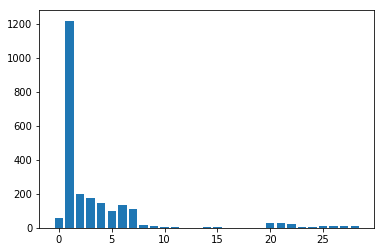

In [25]:
# match variables and scores
variable_score={}
for i in range(len(fs.scores_)):
    variable_score[variable_x[i]]=fs.scores_[i]
    print('%s: %f' % (variable_x[i], fs.scores_[i]))

In [26]:
#drop columns with low score
columns_drop=[]
for k,v in variable_score.items():
    if v<9:
        columns_drop.append(k)
columns_drop

['DUE_AMT_SEP',
 'DUE_AMT_OCT',
 'DUE_AMT_NOV',
 'DUE_AMT_DEC',
 'July_Excess',
 'Aug_Excess',
 'Sep_Excess',
 'Oct_Excess',
 'Nov_Excess',
 'Dec_Excess',
 'EDUCATION_STATUS_High School',
 'EDUCATION_STATUS_Other']

In [27]:
#get important column in their categorical form for catboost
df_catboost=df[['Gender','EDUCATION_STATUS','MARITAL_STATUS','balance_limit_clean','Age_int'
             ,'Avg_Late','PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC',
            'NEXT_MONTH_DEFAULT']]

In [28]:
df_catboost.dtypes

Gender                  object
EDUCATION_STATUS        object
MARITAL_STATUS          object
balance_limit_clean      int64
Age_int                 object
Avg_Late               float64
PAID_AMT_JULY            int64
PAID_AMT_AUG             int64
PAID_AMT_SEP             int64
PAID_AMT_OCT             int64
PAID_AMT_NOV             int64
PAID_AMT_DEC             int64
NEXT_MONTH_DEFAULT       int64
dtype: object

In [29]:
#get indices of categorical columns
categorical_features_indices =np.array([ 0,  1,  2,  3,  4])
categorical_features_indices

array([0, 1, 2, 3, 4])

In [30]:
#seperate dependant and independant columns of catboost df
y=df_catboost['NEXT_MONTH_DEFAULT']
X=df_catboost.drop('NEXT_MONTH_DEFAULT',axis=1)
variable_y='NEXT_MONTH_DEFAULT'
variable_x=X.columns


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [31]:
#initiate and fit catboost algorithm
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=100, depth=15, learning_rate=0.1, loss_function='Logloss')
model.fit(X_train, y_train,cat_features=categorical_features_indices)

0:	learn: 0.6549579	total: 898ms	remaining: 1m 28s
1:	learn: 0.6281240	total: 1.38s	remaining: 1m 7s
2:	learn: 0.6053206	total: 1.89s	remaining: 1m 1s
3:	learn: 0.5830213	total: 2.41s	remaining: 57.8s
4:	learn: 0.5637574	total: 2.87s	remaining: 54.6s
5:	learn: 0.5498465	total: 3.42s	remaining: 53.6s
6:	learn: 0.5346326	total: 3.9s	remaining: 51.8s
7:	learn: 0.5207613	total: 4.41s	remaining: 50.8s
8:	learn: 0.5100689	total: 4.92s	remaining: 49.7s
9:	learn: 0.5006428	total: 5.44s	remaining: 49s
10:	learn: 0.4911184	total: 5.45s	remaining: 44.1s
11:	learn: 0.4838299	total: 5.96s	remaining: 43.7s
12:	learn: 0.4767173	total: 6.47s	remaining: 43.3s
13:	learn: 0.4706228	total: 6.94s	remaining: 42.6s
14:	learn: 0.4653626	total: 7.42s	remaining: 42s
15:	learn: 0.4605162	total: 7.93s	remaining: 41.6s
16:	learn: 0.4555707	total: 8.4s	remaining: 41s
17:	learn: 0.4505180	total: 8.91s	remaining: 40.6s
18:	learn: 0.4460493	total: 9.41s	remaining: 40.1s
19:	learn: 0.4421488	total: 9.88s	remaining: 39.

In [32]:
#score algorithm
y_pred = model.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      5597
           1       0.60      0.30      0.40      1603

    accuracy                           0.80      7200
   macro avg       0.71      0.62      0.64      7200
weighted avg       0.78      0.80      0.77      7200

